<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase2_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Álgebra Lineal Numérica con Julia

(es importante que este jupyter notebook corra en Julia. Para eso deeplegar la pestaña "Connect" y elegir para cambiar el runtime a Julia)

Este notebook explora los conceptos fundamentales de la multiplicación de matrices y espacios columna en álgebra lineal.
Se utilizan ejemplos prácticos en Julia para reforzar los conceptos clave.

Los ejercicios que comiencen con $(\dagger)$ tienen cierta dificultad.

---

## Multiplicación de Matrices $Ax$ Usando Columnas de $A$
La multiplicación de una matriz $A$ por un vector $x$ se puede hacer de dos maneras:
1. Utilizando las filas de $A$ y calculando productos internos.
2. Utilizando las columnas de $A$ y combinaciones lineales.

La matriz $A$ y el vector $x$ son:$$\mathbf{A} = \begin{bmatrix} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix}, \quad \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$$

Luego el producto $Ax$ se puede escribir como  el producto escalar de las filas:
$$
Ax= \begin{bmatrix} \langle (1,4), (x_1,x_2)\rangle \\ \langle (2,5), (x_1,x_2)\rangle \\\langle (3 ,6),(x_1,x_2)\rangle \end{bmatrix}
$$
o más importante como <u>**combinación lineal**</u> de las columnas:
$$Ax= x_1\begin{bmatrix} 1 \\ 2\\3 \end{bmatrix}+x_2\begin{bmatrix} 4 \\ 5 \\6\end{bmatrix}$$


### Este último hecho es <u>**fundamental**</u> en álgebra lineal y en particular en este curso!!





Variando $x_1$ y $x_2$, nos genera el espacio columnas. Que no es otra cosa que el subesacio generado por las columnas de $A$.

In [2]:
using LinearAlgebra

In [ ]:
# Definimos la matriz A
A = [1 4; 2 5; 3 6];
display(A)

3×2 Matrix{Int64}:
 1  4
 2  5
 3  6

In [ ]:
# o una forma alternativa
A=reshape([1, 2, 3, 4, 5, 6], 3, 2)

3×2 Matrix{Int64}:
 1  4
 2  5
 3  6

In [ ]:
#Ejemplo
x=randn(2,1) #tomamos un vector aleatorio con distribución gaussiana en el plano

2×1 Matrix{Float64}:
 -1.2158863829604643
  1.0177680585805509

In [ ]:
#Realicemos el producto
A*x

3×1 Matrix{Float64}:
 2.855185851361739
 2.6570675269818254
 2.4589492026019126

In [ ]:
# Tomemos un vector x=[1,2]
x=[1,2]
# Multiplicación usando filas
Ax_rows = [dot(A[i, :], x) for i in 1:3]
println("Resultado utilizando filas:")
display(Ax_rows)

Resultado utilizando filas:


3-element Vector{Int64}:
  9
 12
 15

In [ ]:
dot(A[1,:],x)

9

In [ ]:
# Multiplicación usando columnas
Ax_columns = A * x
println("Resultado utilizando columnas:")
display(Ax_columns)

Resultado utilizando columnas:


3-element Vector{Int64}:
  9
 12
 15

---
### Digresión: Raíces de polinomios

La primera versión también es interesante, por ejemplo para la evaluación de polinomios:
$$
p(t)=c_0+c_1t+\cdots c_dt^d=
%\left\langle (c_0,c_1,\ldots,c_d),(1,t,\ldots,t^d) \right\rangle
\left\langle \begin{pmatrix}c_0\\c_1\\\vdots\\c_d\end{pmatrix},
\begin{pmatrix}1\\t\\\vdots\\t^d\end{pmatrix} \right\rangle,
$$
que podemos escribir de manera matricial como
$$
p(t)=c^T\gamma(t),
$$
siendo $c$ el vector columna con los coeficientes, y $\gamma(t)$ la curva en $\mathbb{R}^{d+1}$
$$
\gamma(t)=\begin{pmatrix}1\\t\\\vdots\\t^d\end{pmatrix},\quad t\in \mathbb{R}.
$$

(?) Si $t^*$ es una raíz de $p$, i.e. $p(t^*)=0$, qué propiedad geométrica cumple $\gamma(t^*)$?



---


**Ideas/Ejercicio/Proyecto**: (?) Si $t^*$ es una raíz de $p$, i.e. $p(t^*)=0$, cómo podemos caracterizar la curva $\gamma$ en $t^*$?

*   Considerar el caso d=2. Hacer un bosquejo de la normalizción de la
curva para que esté incluida en la esfera $S^2\subset \mathbb{R}^3$, i.e. describir $\gamma(t)/\|\gamma(t)\|$ con $\|\cdot\|$.
* De manera análoga proyectar a la esfera un polinomio genérico con coeficientes $(c_0,c_1,c_2)$.

* Dar una descripción geométrica de que un polinomio de grado 2 tiene a lo sumo 2 raíces.
* Suponga que tiramos un polinomio al azar con coeficientes gaussianos independientes. Cómo se calcularía la esperanza del número de raíces?
---

## Espacio Columna de A
Concentremonos en el espacio columna de A.
Recordar que es el conjunto de todas las combinaciones lineales de sus columnas.

El espacio columna de $A$ está definido por todas las combinaciones lineales de sus columnas:$$\mathbf{Ax} = x_1 \mathbf{a}_1 + x_2 \mathbf{a}_2$$
Donde:$$\mathbf{a}_1 = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}, \quad \mathbf{a}_2 = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$$

In [ ]:
a1 = A[:, 1]  # Primera columna de A
a2 = A[:, 2]  # Segunda columna de A
println("primer y segunda columnas")
display(a1);
a2

primer y segunda columnas


3-element Vector{Int64}:
 1
 2
 3

3-element Vector{Int64}:
 4
 5
 6

- ¿Combinaciones lineales de esos dos vectores llenan el espacio $\mathbb{R}^3$?
- ¿Qué conjunto dan?

Claro, eso dependerá de si son linealmente dependientes o independientes.

In [ ]:
#recordemos A
A

3×2 Matrix{Int64}:
 1  4
 2  5
 3  6

In [ ]:
# Para ver si son linealmente independientes, calculemos el rango
rank([a1 a2])

2

Observar que esto implica que alguno de los menores $2\times 2$ de $A$ es diferente de cero.


In [ ]:
M1 = A[[1,2], :]  # Filas 1 y 2

2×2 Matrix{Int64}:
 1  4
 2  5

In [ ]:
# Extraer menores 2x2 de la matriz
M1 = A[[1,2], :]  # Filas 1 y 2
M2 = A[[1,3], :]  # Filas 1 y 3
M3 = A[[2,3], :]  # Filas 2 y 3

# Calcular determinantes de las matrices 2x2
det1 = det(M1)
det2 = det(M2)
det3 = det(M3)

println("Determinantes menores 2x2:")
println(det1, ", ", det2, ", ", det3)

Determinantes menores 2x2:
-3.0, -6.0, -3.0


Es esto algo general? o tipicamente alguno de los determinantes da cero?


In [ ]:
B = randn(3, 2)  # Matriz 3x2 aleatoria

# Extraer menores 2x2 de la matriz
M1 = B[[1,2], :]  # Filas 1 y 2
M2 = B[[1,3], :]  # Filas 1 y 3
M3 = B[[2,3], :]  # Filas 2 y 3

# Calcular determinantes de las matrices 2x2
det1 = det(M1)
det2 = det(M2)
det3 = det(M3)
rB=rank(B)
println("Rango de B y Determinantes menores 2x2:")
println( rB, ", ",det1, ", ", det2, ", ", det3)

Rango de B y Determinantes menores 2x2:
2, 1.0528709501471711, 2.0369330215355945, -0.9414122803668095


Fabriquemos una función y pongamos a prueba en otros casos

In [ ]:
function menores_2x2(A::Matrix{<:Number})
    if size(A) != (3,2)
        error("La matriz debe ser de tamaño 3x2")
    end

    # Seleccionar todas las combinaciones de 2 filas
    indices = [(1,2), (1,3), (2,3)]

    # Calcular determinantes de los menores 2x2
    determinantes = [det(A[[i,j], :]) for (i,j) in indices]

    return determinantes
end

menores_2x2 (generic function with 1 method)

In [ ]:
# Ejemplo de uso:
B = randn(3,2)  # Matriz aleatoria 3x2
det_menores = menores_2x2(B)

println("Determinantes de los menores 2x2:", det_menores)


Determinantes de los menores 2x2:[0.5837920186140807, -1.6696856927000876, -0.07058251849327958]


Es claro que sería una *particularidad*, y formalmente un evento de probabilidad cero.



---
**($\dagger$)Ejercicio:** dar un argumento que ilumine este hecho.

<details>
  <summary><b>Sugerencia/Idea</b></summary>
  Probar que el conjunto de matrices con de $3 \times 2$ que tiene algún menor con determinante cero es una variedad algebraica: i.e. son los ceros de un polinomio en los coeficientes de la matriz. Esto implica que el conjunto tiene es de una dimensión menor a 3 y por lo tanto tiene medida cero.
  </details>

  
  ---

---
**Ejercicio:** Fabrique un ejemplo donde esto no ocurra.
<details>
  <summary><b>Mostrar solución</b></summary>
  Por ejemplo
  $$
\begin{pmatrix} 1& 0\\ 0&1\\ 0&0\end{pmatrix}
  $$

   b1=[1,0,0]
b2=[0,1,0]
B=[b1 b2]
menores_2x2(B)
</details>

---

Bien, el rango de nuestra matriz $A$ es dos, y al menos llegaríamos a cualquier punto del subespacio de dimension 2 (el plano) generado por las columnas de $A$. Veamos que hay vectores que no se pueden obtener como combinación lineal de las columnas.

Por ejemplo es fácil ver que $b=[1,1,1]$ no es generado por las columnas de A. Para eso basta ver que el sistema de ecuaciones es incompatible.

---

 📌 ¿Por qué el sistema es incompatible? Mostrarlo

<details> <summary><b>Detalles</b></summary>
## 📌 Incompatibilidad del sistema $A \mathbf{x} = \mathbf{b}$


Dado el sistema:

$$
A = \begin{bmatrix} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix}, \quad
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}, \quad
\mathbf{b} = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
$$

El sistema de ecuaciones es:

$$
\begin{aligned}
x_1 + 4x_2 &= 1 \\
2x_1 + 5x_2 &= 1 \\
3x_1 + 6x_2 &= 1
\end{aligned}
$$

**Paso 1:** Restar ecuaciones
Restamos la primera ecuación a la segunda:

$$
(2x_1 + 5x_2) - (x_1 + 4x_2) = 1 - 1
$$

$$
x_1 + x_2 = 0
$$

**Paso 2:** Identificar inconsistencia
 Sin embargo, al sustituir en la primera ecuación original:

$$
x_1 + 4x_2 = 1
$$

Sustituyendo \( x_1 = -x_2 \):

$$
-x_2 + 4x_2 = 1
$$

$$
3x_2 = 1 \quad \Rightarrow \quad x_2 = \frac{1}{3}
$$

Ahora sustituimos en \( x_1 = -x_2 \):

$$
x_1 = -\frac{1}{3}
$$

 ❌ **Contradicción**
Si sustituimos en la tercera ecuación original:

$$
3x_1 + 6x_2 = 1
$$

$$
3\left(-\frac{1}{3}\right) + 6\left(\frac{1}{3}\right) = -1 + 2 = 1
$$

⚠ **Pero esta ecuación es redundante y no aporta nueva información.**
Dado que el sistema tiene más ecuaciones que restricciones independientes, es **incompatible**.

✍️ **Conclusión:** El sistema no tiene solución porque la última ecuación no es consistente con las anteriores.

✍️ **Ejercicio:** Realiza los cálculos y explica por qué el sistema no tiene solución.
</details>

---


Considermos una combinación lineal de las columnas de $A$. Por ejemplo $c=a_1+2a_2$:

In [ ]:
c=1*a1 +2*a2;

De la propiedad fundamental, se tiene que el vector $c$ es la imagen de aplicar $A$ al vector con coordenadas $[1,2]^T$. Por lo tanto debería ser solución del sistema $Ax=c$.

En Julia tenemos el comando \ para resolver un sistema lineal. Lo veremos en detalle más adelante.

In [ ]:
#Resolvamos el sistema usando el comando "\" de Julia.
y=A\c

2-element Vector{Float64}:
 0.9999999999999958
 2.000000000000002

In [ ]:
# Veamos la norma de la diferencia
norm(A*y-c)

5.891509130072236e-15

Considremos un $b$ aleatorio y juguemos un poco con eso.

In [ ]:
#Tomemnos un punto al azar (con distribución gaussiana en R^3)
b=randn(3,1)
#Resolvamos el sistema
y=A\b

2×1 Matrix{Float64}:
 -1.560001207677371
  0.6036422996444988

No debería ser incompatible? O sea, un vector  gaussiano estándar en $\mathbb{R}^3$ debería tener probabilidad cero de caer en el plano (el espacio columna).

In [ ]:
norm(A*y-b)

0.25124037624509826

Qué sucede? La operación $A\backslash b$ lo que hace es lo que se denomina la **pseudoinversa** de A aplicada a b, y en palabras busca el vector del dominio que su imagen está más cerca de $b$

Recordar modeos lineales!

Considremos muchos puntos aleatorios sobre el dominio, y calculemos la distancia al vector $b$. Y comparemos esa distancia con $Ay$.

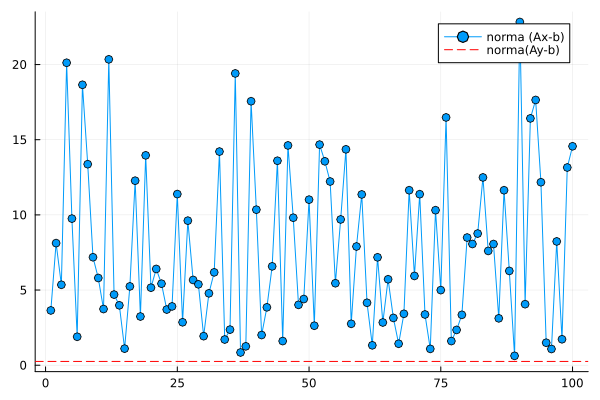

In [ ]:
using Random, Plots

# Parámetros
num_samples = 100  # Número de muestras aleatorias


# Cálculo del error para muchas x aleatorias
errores = Float64[]
for _ in 1:num_samples
    x = randn(2)  # x aleatorio en R^n
    push!(errores, norm(A * x - b))  # Error de la norma
end
#plot(errores)
p=plot(errores, marker=:o, label="norma (Ax-b)")#, linewidth=2)
# Comparar con la norma de la proyección de b
#error_proyeccion = norm(b - b_proj)
y=A\b #solución por mínimos
min=norm(A*y-b)
# Graficar los resultados

#title!("Comparación del error ||Ax - b|| con proyección")
#xlabel!("Norma del error")
#ylabel!("Frecuencia")
hline!([min], linewidth=1, linestyle=:dash, color=:red, label="norma(Ay-b)")

In [ ]:
#Comparemos errores
minimum(errores)

0.6225270135944639

In [ ]:
norm(A*y-b)

0.25124037624509826

## Dependencia Lineal y Rango de una Matriz
El rango de una matriz es el número de columnas independientes. Si una columna es combinación lineal de otras, no contribuye a la dimensión del espacio.
Consideremos por ejemplo:
$$\mathbf{A} = \begin{bmatrix} 1 & 4 & 5 \\ 2 & 5 & 7 \\ 3 & 6 & 9 \end{bmatrix}$$



Observar que la última columna de $A_2$ es la suma de las primeras dos.

In [ ]:
A = reshape([1,2,3,4,5,6,5,7,9],3,3)
display(A)

3×3 Matrix{Int64}:
 1  4  5
 2  5  7
 3  6  9

In [ ]:
A*[1,1,-1]

3-element Vector{Int64}:
 0
 0
 0

In [ ]:
rank_A = rank(A)
println("Rango de A:", rank_A)

Rango de A:2


## Descomposición en Matrices $C$ y $R$ (columnas y filas)

Descomponemos la matriz $A$ como producto de una matriz $C$ que contiene las columnas linealmente independientes, y una matriz de  $R$, de modo que:
$$\mathbf{A} = \mathbf{C} \mathbf{R}$$


En nuestro caso podemos consdierar la matriz C como las dos primeras columnas:
$$
(*)\quad\underbrace{\begin{pmatrix} 1 & 4 & 5 \\ 2 & 5 & 7 \\ 3 & 6 & 9 \end{pmatrix}}_{A}
=
\underbrace{\begin{pmatrix}
1&4\\2&5\\3&6
\end{pmatrix}}_{C}⋅
\underbrace{\begin{pmatrix}
1&0&1\\0&1&1
\end{pmatrix}}_R
$$
Observar que si la matriz $A$ es $n\times n$, y de rango $r$ entonces en esta descomposición $C$ es de tamaño $n\times r$ y $R$ de tamaño $r\times n$:
$$
\underbrace{A}_{n\times n}=\underbrace{C}_{n\times r}\cdot \underbrace{R}_{r\times n}
$$

También es importante notar que la descomposición no es única, dado que podemos elegir de formas distintas las columnas que forman una base del espacio columnas.

In [ ]:
C=reshape([1,2,3,4,5,6],3,2)

3×2 Matrix{Int64}:
 1  4
 2  5
 3  6

In [ ]:
R=[1 0 1;0 1 1]

2×3 Matrix{Int64}:
 1  0  1
 0  1  1

In [ ]:
A==C*R

true

Otro ejemplo sencillo es:
$$
\begin{pmatrix}
1&2&3&4\\
1&2&3&4\\
1&2&3&4\\
1&2&3&4
\end{pmatrix}=
\begin{pmatrix}1\\1\\1\\1\end{pmatrix}\cdot
\begin{pmatrix}1&2&3&4\end{pmatrix}
$$
Observar que si conocemos que nuestra matriz tiene rango bajo $r\ll n$, entonces en vez de tener $n^2$ coeficientes, nuestra matriz puede ser codificada en $2n\cdot r$ coeficientes que es mucho más chico que $n^2$.

Realicemos algunas consideraciones.
- La matriz $C$ tiene forman una base del espacio columnas de $A$
- Un hecho muy interesante es que la matriz $R$ resulta ser una base del espacio de filas de $A$. Este hecho es un resultado importante: \\
 **``la dimensión del espacio columna coincide con la dimensión del espacio fila''**

 Veamos esto para el caso de nuestra matriz $A$. La prueba se extiende fácilmente para el caso general.

 Observar que las filas de $R$ son independientes, dado que el primer bloque es la identidad, i.e., $R$ en nuestro caso es de la forma
 $$
R=\begin{pmatrix}
Id_2 & v
\end{pmatrix}
 $$
 con $v=\binom11$. Lo que faltaría ver que son una base del espacio filas de $A$.

 Veamos que las filas de $A$ se pueden escribir como combinación lineal de las filas de $R$.

De $(*)$ tenemos que las filas de $A$ son combinaciones lineales de las filas de $R$:

 $$
(1,4,5)=1(1,0,1)+4(0,1,1)\\
(2,5,6)=2(1,0,1)+5(0,1,1)\\
(3,6,9)=3(1,0,1)+6(0,1,1)
 $$

 Por lo tanto las filas de $R$ general las filas de $A$. Ya está? o falta algo? tenemos que las filas de $R$ son independientes y cualquier fila de $A$ es combinación lineal de las filas de $R$. Entonces deberían ser una base,no?



 Faltaría ver que los vectores filas están en el espacio columnas! Eso es lo que entendemos por un "generador" de un subespacio.

 (Observar que la base canónica genera cualquier vector en un subespacio fijo, y obviamente son independientes, pero eso no implica que la base canónica es un generador  dicho subsepacio.)

**Ejercicio:** Pruebe que las filas de $R$ están en el espacio fila de $A$.


 <details>
 <summary><b>Apriete aquí para ver la respuesta</b></summary>

 Por qué las filas de $R$ están en el espacio filas $R(A)$ de $A$?

$$
\begin{pmatrix} 1 & 4 & 5 \\ 2 & 5 & 7
\end{pmatrix}
=
\begin{pmatrix}
1&4\\2&5
\end{pmatrix}\cdot
\begin{pmatrix}
1&0&1\\0&1&1
\end{pmatrix}
$$
Luego como el menor $2x2$ (la primer matriz) es invertible podemos multiplicar a izquierda y obtener
$$
\begin{pmatrix}
a&c\\b&d
\end{pmatrix}\cdot \begin{pmatrix} 1 & 4 & 5 \\ 2 & 5 & 7
\end{pmatrix}=
\begin{pmatrix}
1&0&1\\0&1&1
\end{pmatrix}  
$$
siendo la primer matriz la inversa del menor considerado.

Acá es importane que el menor $2\times 2$ que hemos tomado sea invertible.

Recordar que la inversa de una matriz 2x2 viene dada por la fórmula:
$$
\begin{pmatrix}
\alpha &\gamma\\\beta&\delta
\end{pmatrix}^{-1}=
\frac{1}{\alpha\delta-\beta\gamma}
\begin{pmatrix}
\delta&-\beta\\-\gamma&\alpha
\end{pmatrix}
$$

 </details>




**$(\dagger)$ Ejercicio:** Argumentar para el caso general. Es decir, dar una prueba de que en la descomposición $A=CR$ (en general), se tiene que las filas de $R$ son una base del espacio filas.

$(\dagger)$**Ejercicio:** Encontrar la matriz $2\times 2$ tal que

$(\dagger)$ **Ejercicio:** Argumentar porqué siempre podemos descomponer una matriz $A$ de rango $r$ de la forma
$$
A=C \Delta R,
$$
con
- $C$ una matriz $n\times r$ que es base del espacios columnas,
- $\Delta$ matriz $r\times r$ invertible,
- $R$  matriz $r\times n$ que es una base del espacio filas de $A$.